> **Write a program which returns all distinct nonattacking placements of n queens on an n x n chessboard, where n is an input to the program.**  

_Hint: lf the first queen is placed at (i, j), where can the remaining queens definitely not be placed?_  

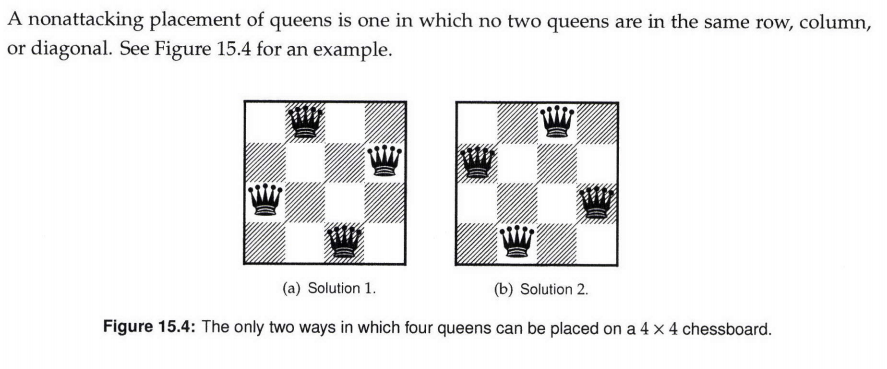

- [Clean Explanation](https://www.youtube.com/watch?v=xouin83ebxE&t=713s&ab_channel=TusharRoy-CodingMadeSimple)
- [Java Code](https://github.com/mission-peace/interview/blob/master/src/com/interview/recursion/NQueenProblem.java)

- **Leet Code N-Queen Problems**
    1. [51. N-Queens](https://leetcode.com/problems/n-queens/)
    2. [52. N-Queens II](https://leetcode.com/problems/n-queens-ii/)

In [108]:
from typing import List
from collections import namedtuple

Pos = namedtuple("Position",( "row", "col"))

def n_queens(n: int) -> List[List[int]]:
    def isSafeSpace(row, column):
        for queen in range(row):
            if positions[queen].col == column or \
            positions[queen].row - positions[queen].col == row - column or \
            positions[queen].row + positions[queen].col == row + column:
                return False
        return True
    def solveNQueenHelper(n, row, positions) -> bool:
        if row == n:
            return True

        for column in range(n):
            if isSafeSpace(row, column):
                positions[row] = Pos(row, column)
                if solveNQueenHelper(n, row + 1, positions):
                    return True
        return False

    positions: List[Pos] = [Pos(-1,-1) for _ in range(n)]
    print(positions)
    has_solution = solveNQueenHelper(n, 0, positions)
    
    if has_solution:
        return [[p.row, p.col] for p in positions]
    else:
        return [[positions.row, positions.col]]
    print(positions)
n_queens(4)

[Position(row=-1, col=-1), Position(row=-1, col=-1), Position(row=-1, col=-1), Position(row=-1, col=-1)]


[[0, 1], [1, 3], [2, 0], [3, 2]]

> **Variant: Return all possible placements of the N-Queens** 

In [116]:
from typing import List
from collections import namedtuple

Pos = namedtuple("Position",( "row", "col", "place"))

def n_queens(n: int) -> List[List[int]]:
    res = []
    def isSafeSpace(row, column):
        for queen in range(row):
            if positions[queen].col == column or \
            positions[queen].row - positions[queen].col == row - column or \
            positions[queen].row + positions[queen].col == row + column:
                return False
        return True
    
    def solveNQueenHelper(n, row, positions):
        if row == n:
            res.append(["".join(val) for _,_,val in positions])
            return

        for column in range(n):
            if isSafeSpace(row, column):
                positions[row] = Pos(row, column, ["Q" if x == column else "." for x in range(n)])
                solveNQueenHelper(n, row + 1, positions)
                positions[row] = Pos(-1, -1, None)
        return
                

    positions: List[Pos] = [Pos(-1,-1, None) for _ in range(n)]
    
    solveNQueenHelper(n, 0, positions)
    
    return res
n_queens(4)

[['.Q..', '...Q', 'Q...', '..Q.'], ['..Q.', 'Q...', '...Q', '.Q..']]